### Gradient Descent

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
#导出数据，X为特征，y为房价
data = load_boston()
X,y = data['data'], data['target']
print(X.shape,len(y))

(506, 13) 506


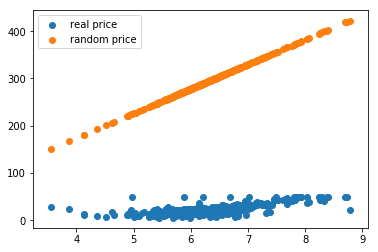

In [2]:
#以X中的一个特征和y作图
def price(rm,k,b):
    return rm * k + b
#选择X的第五个特征，房间数量
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y,label="real price")
plt.scatter(X_rm,price_by_random,label="random price")
plt.legend()

### Loss Function
 $$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
 $$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$
 
 $$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$
 
 $$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
 
 $$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [3]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [4]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

### 老师的方法：

In [22]:
trying_times = 2000
min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04
update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.
                  format(i, current_k, current_b, min_loss))
    #利用公式求出k/b的导数
    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    b_gradient = partial_b(X_rm, y, price_by_k_and_b)
    #更新参数
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: -99.01598446396869 best_b: 47.43571900370944, and the loss is: 362661.4735492204
When time is : 50, get best_k: -67.67239868830767 best_b: 52.351174524173274, and the loss is: 159350.48807884977
When time is : 100, get best_k: -46.90097999701338 best_b: 55.60463321393186, and the loss is: 70067.21410028754
When time is : 150, get best_k: -33.13553683251437 best_b: 57.7567184651388, and the loss is: 30858.782915737076
When time is : 200, get best_k: -24.012821403449948 best_b: 59.178944811350746, and the loss is: 13640.531559218083
When time is : 250, get best_k: -17.96675403260124 best_b: 60.11750791718839, and the loss is: 6079.1853868689695
When time is : 300, get best_k: -13.959523296058007 best_b: 60.73555699969747, and the loss is: 2758.6329920767594
When time is : 350, get best_k: -11.303391164094853 best_b: 61.141207963595384, and the loss is: 1300.4093186488112
When time is : 400, get best_k: -9.542606633556018 best_b: 61.40610717692105, and the lo

### 我的方法：

In [28]:
trying_times = 2000
min_loss = float('inf')
best_k,best_b = random.random() * 200 - 100,random.random() * 200 - 100
n = 0
alpha = 0.0005



while n < trying_times:
    price_by_random = [price(r,best_k,best_b) for r in X_rm]
    gradient_loss = loss(y,price_by_random)
    if gradient_loss < min_loss:
        min_loss = gradient_loss
        if n % 50 ==0:
            print("In loop: {},k: {}, b: {}, loss: {}".format(n,best_k,best_b,gradient_loss))
    n += 1
    #diff_k和diff_b是参数k和b的偏导数的求和部分
    diff_k,diff_b =0,0
    for i in range(len(X_rm)):
        #y = x0*k + x1*b, 其中x1=1
        diff_k += (best_k * X_rm[i-1] + best_b - y[i-1]) * X_rm[i-1]
        diff_b += (best_k * X_rm[i-1] + best_b - y[i-1]) * 1
    #梯度下降
    best_k -= alpha * (diff_k / len(X_rm))
    best_b -= alpha * (diff_b / len(X_rm))

In loop: 0,k: 25.35870000015545, b: -36.15568310968336, loss: 10310.606836230341
In loop: 50,k: 15.275981126840076, b: -37.7395232220877, loss: 1339.1296159493118
In loop: 100,k: 11.694473804693226, b: -38.30134028452595, loss: 207.22131127944934
In loop: 150,k: 10.422200410223173, b: -38.500134431316454, loss: 64.41125153288957
In loop: 200,k: 9.970168203410637, b: -38.56998286980798, loss: 46.393173214781534
In loop: 250,k: 9.809486150239852, b: -38.59402995175025, loss: 44.11977825945264
In loop: 300,k: 9.752291866728344, b: -38.60180859619924, loss: 43.83284956528463
In loop: 350,k: 9.731856531532081, b: -38.6038089120549, loss: 43.7965482699083
In loop: 400,k: 9.72447803087568, b: -38.60375699165551, loss: 43.79186804900921
In loop: 450,k: 9.721737360997736, b: -38.602976344964596, loss: 43.79117743794831
In loop: 500,k: 9.720644087155973, b: -38.601937083374736, loss: 43.7909902458706
In loop: 550,k: 9.720136005286806, b: -38.60080619064031, loss: 43.790866629006985
In loop: 600,

### 梯度下降的速度很大的依赖于学习率的大小，如果学习率太小则速度会很慢。例如在alpha=0.0001时，几乎需要迭代1000次才能使得loss降为100左右；如果把alpha设置为0.0005，则在迭代不到200次的时候就达到了loss值100以下。